In [1]:
import pandas as pd
import numpy as np

In [2]:
import re
import nltk

# LEGEND

0: Hate Speech

1: Offensive Language

2: Neither Hate Nor Offensive

In [3]:
dataset = pd.read_csv("labeled_data.csv")

In [4]:
dataset.shape

(24783, 7)

In [5]:
# To check if there's any null/missing value
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [6]:
dataset["labels"] = dataset["class"].map({
    0: "Hate Speech",
    1: "Offensive Language",
    2: "Neither Hate Nor Offensive"
})

In [7]:
data = dataset[["tweet","labels"]]

In [8]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,Neither Hate Nor Offensive
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",Neither Hate Nor Offensive
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [9]:
data.shape

(24783, 2)

In [10]:
from nltk.corpus import stopwords

In [11]:
set_stopwords = set(stopwords.words("English"))

In [12]:
set_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [13]:
stemmer = nltk.SnowballStemmer(language = "english")

In [14]:
stemmer

In [15]:
import string

In [16]:
# DATA CLEANING

def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub("https?://\S+|www.\S+",'',tweet)
    tweet = re.sub('\[.?\]','',tweet)
    tweet = re.sub("\[%s\]"%re.escape(string.punctuation),'',tweet)
    tweet = re.sub('\n','',tweet)
    tweet = re.sub('\w\d\w','',tweet)
    tweet = [word for word in tweet.split(' ') if word not in set_stopwords]
    tweet = " ".join(tweet)
    tweet = [stemmer.stem(word) for word in tweet.split(' ')]
    tweet = " ".join(tweet)
    return tweet

In [17]:
data.loc[:,"tweet"] = data.loc[:,"tweet"].apply(clean_tweet) 

In [18]:
data["tweet"][24]

'" got ya bitch tip toe hardwood floor " &#; '

In [19]:
X = np.array(data["tweet"])
Y = np.array(data["labels"])

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [21]:
cv = CountVectorizer()

In [22]:
x = cv.fit_transform(X)

In [23]:
x_train,x_test,y_traim,y_test = train_test_split(x,Y, random_state = 55, test_size = 0.25)

In [24]:
y_test

array(['Offensive Language', 'Offensive Language', 'Offensive Language',
       ..., 'Offensive Language', 'Offensive Language',
       'Offensive Language'], dtype=object)

In [25]:
model = DecisionTreeClassifier()
model.fit(x_train,y_traim)

DecisionTreeClassifier()

In [26]:
y_pred = model.predict(x_test)

In [27]:
from sklearn. metrics import accuracy_score
print (accuracy_score (y_test,y_pred))

0.8967075532601678


In [28]:
tweet_test = [
    "I Love You. You are most beautiful girl I've dated",
    "Fuck You, Bitch.",
    "Kill all the Africans. Fucking Black Rats."
    ]
tweet_test = cv.transform(tweet_test)
y_hat_ = model.predict(tweet_test)

In [29]:
y_hat_

array(['Neither Hate Nor Offensive', 'Offensive Language',
       'Neither Hate Nor Offensive'], dtype=object)

In [30]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

In [31]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[ 120,   23,  172],
       [  29,  901,  154],
       [ 165,   97, 4535]], dtype=int64)

Text(0.5, 3.722222222222216, 'Truth')

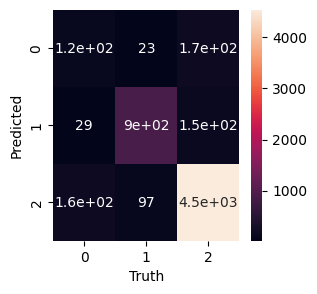

In [32]:
plt.figure(figsize = (3,3))
sn.heatmap(cm,annot = True)
plt.ylabel("Predicted")
plt.xlabel("Truth")

In [33]:
import pickle

In [36]:
with open("decision_tree_model","wb") as f:
    pickle.dump(model,f)

In [37]:
with open("decision_tree_vocab","wb") as f:
    pickle.dump(cv.vocabulary_,f)